In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import copy
import warnings
warnings.filterwarnings('ignore')

In [6]:
plt.rc('axes', lw=1.5)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('xtick.major', size=5, width=3)
plt.rc('ytick.major', size=5, width=3)

## 线性回归

In [7]:
linear_data = pd.read_csv('data/regression/linear.csv')
linear_data.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


### 标准形式
给定样本$\vec x = [x_1, x_2, \cdots, x_n]$，线性回归预测$y$，
$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2 x_2 + \cdots + \theta_n x_n$$
给定$m$个训练样本$\vec x^{(1)}, \vec x^{(2)}, \cdots, \vec x^{(m)}$，线性回归通过最小化均方误差(Mean Square Error, MSE)来最小化$\bar{y}$和$y$偏离。
$$MES(\vec \theta) = \frac{1}{m} \sum_{i=1}^m(\hat{y}^{(i)}-y)^2=\frac{1}{m}\sum_{i=1}^m(\vec \theta \cdot \vec x^{(i)} - y) ^2$$
其中$y$表示真实值，$\bar y$表示预测值。可以利用求导极值的方式求导最小化问题$\frac{\partial MSE}{\partial \vec \theta}=0$，则
$$\hat{\vec \theta}=(X^T \cdot X)^{-1} \cdot X^T \cdot \vec y$$
其中$X$的输入大小为$m\times(n+1)$，每一行对应一个样本，每一列对应一个特征，其中$\theta_0$表示多余的一列，$\vec y$大小为$m\times1$，并且$\hat{\vec \theta}$大小为$(n+1)\times 1$。

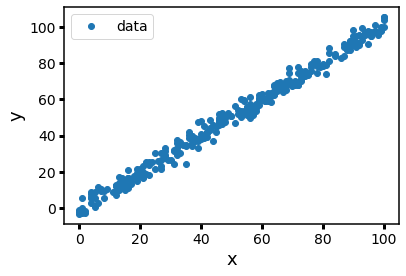

In [8]:
plt.plot('x', 'y', data=linear_data, marker='o', linestyle='', label='data')
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [10]:
x = linear_data['x'].tolist()
y = linear_data['y'].tolist()
xb = np.c_[np.ones((len(x), 1)), x]
theta_hat = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
print(theta_hat)

[-0.46181077  1.01433536]


其中*theta_hat[0]*表示截距，*theta_hat[1]*表示斜率

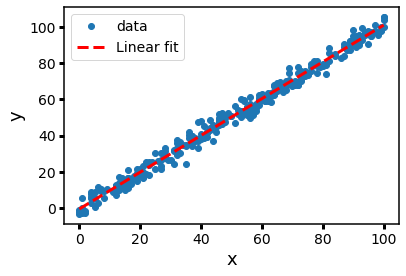

In [18]:
x_fit = np.linspace(0, 100, num=200)
x_fitb = np.c_[np.ones((len(x_fit),1)), x_fit]
y_fit = x_fitb.dot(theta_hat)
plt.plot('x','y',data = linear_data, marker = 'o', linestyle = '', label = 'data')
plt.plot(x_fit, y_fit, color = 'r', lw = 3, linestyle = '--', label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

### Scikit-Learn

In [19]:
linear_reg = LinearRegression()
x = np.array(x).reshape(-1, 1)
linear_reg.fit(x, y)
print('截距为：',linear_reg.intercept_, '斜率为：', linear_reg.coef_)

截距为： -0.4618107736611776 斜率为： [1.01433536]


### Statsmodels

In [22]:
xb = sm.add_constant(x)
model = sm.OLS(y, xb) # ordinary least squares 普通最小二乘
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 2.709e+04
Date:                Mon, 03 Feb 2020   Prob (F-statistic):          1.33e-294
Time:                        12:35:34   Log-Likelihood:                -757.98
No. Observations:                 300   AIC:                             1520.
Df Residuals:                     298   BIC:                             1527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4618      0.360     -1.284      0.200      -1.169       0.246
x1             1.0143      0.006    164.598      0.000       1.002       1.026
==============================================================================
Omnibus:                        1.034   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.825
Skew:                           0.117   Prob(JB):                        0.662
Kurtosis:                       3.104   Cond. No.                         120.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 梯度下降
梯度下降对应于大规模的样本输入或者处理大的训练集问题。其基本思想是价值函数(cost function)是沿着梯度的相反方向下降最大。在上面的例子中价值函数为$MSE(\vec \theta)$。$MSE(\vec \theta)$对$\vec \theta$进行求导：
$$\triangledown_{\vec \theta} MSE(\vec \theta) = \frac{2}{m}X^T\cdot(X\cdot\vec \theta-\vec y)$$
其中$m$表示训练集样本数。$X$表示训练集输入,大小为$m\times (n+1)$，$\vec\theta$的参数大小为$(n+1)\times1$，$\vec y$表示目标值大小为$m\times1$，其中梯度下降的基本流程为：
- 初始化参数向量$\vec \theta$.
- 选择学习速率$\mu$.
- 更新参数$\vec \theta = \vec \theta - \mu \times \triangledown_{\vec \theta}MSE(\vec \theta)$.
- 迭代知道经过一定数量的步骤，或者当$MSE(\vec \theta)$的减小幅度在可容忍的范围之内.

需要保证：
- 所有特征都在一个相同的刚量范围内，主要是为了减少训练时间
- 凸函数易于优化，但是大多数情况下，*GD*会导致局部最小值

#### Batch gradient descent

- 批梯度下降是利用了$m$个样本来进行的

In [23]:
learning_rate = 0.0002
num_iterations = 100000
y = np.array(y).reshape(-1, 1)
m = len(y)
theta = np.random.randn(2, 1)
for i in range(num_iterations):
    gradient = 2./m*xb.T.dot(xb.dot(theta)-y)
    theta = theta - learning_rate * gradient

In [24]:
theta

array([[-0.46185478],
       [ 1.01433601]])

In [25]:
def mse(xb, y, theta):
    return np.sum(np.square(xb.dot(theta)-y))/len(y)

不同的学习速率初始值会导致不同的结果

In [26]:
learning_rate = 0.0002
num_iterations = 100000
y = np.array(y).reshape(-1, 1)
m = len(y)

theta = np.random.randn(2, 1)
cost = []
for i in range(num_iterations):
    gradient = 2./m*xb.T.dot(xb.dot(theta) - y)
    theta = theta - learning_rate * gradient
    cost.append(mse(xb, y, theta))

Text(0, 0.5, 'MSE')

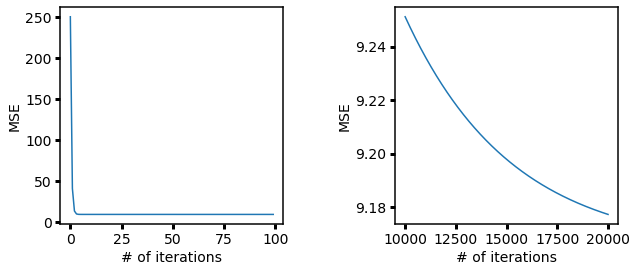

In [27]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))
ax[0].plot(range(0,100),cost[0:100])
ax[1].plot(range(10000,20001), cost[10000:20001])
plt.subplots_adjust(wspace=0.5)
ax[0].set_xlabel('# of iterations', fontsize = 14)
ax[1].set_xlabel('# of iterations', fontsize = 14)
ax[0].set_ylabel('MSE', fontsize = 14)
ax[1].set_ylabel('MSE', fontsize = 14)

尝试递增学习速率

Text(0, 0.5, 'MSE')

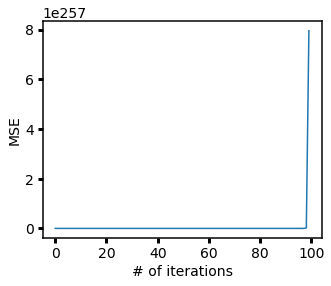

In [28]:
learning_rate = 0.003
num_iterations = 100
y = np.array(y).reshape(-1, 1)
m = len(y)
theta = np.random.randn(2, 1)
cost = []
for i in range(num_iterations):
    gradient = 2. / m * xb.T.dot(xb.dot(theta) - y)
    theta = theta - learning_rate * gradient
    cost.append(mse(xb, y, theta))
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))
ax.plot(range(0,100), cost[0:100])
ax.set_xlabel('# of iterations', fontsize = 14)
ax.set_ylabel('MSE', fontsize = 14)

上面导致的结果的原因是由于数据没有标准化，这将导致梯度迭代的数据比例不一致

In [29]:
theta = np.random.randn(2, 1)
gradient = 2./m*xb.T.dot(xb.dot(theta) - y)
print(gradient)

[[  -64.25854463]
 [-4300.90848712]]


标准化数据，使得数据样本在每梯度下降时的步长一致。

In [30]:
xb_standard = copy.deepcopy(xb)
mu = np.mean(xb_standard[:,1])
sigma = np.std(xb_standard[:, 1])
xb_standard[:,1] = (xb_standard[:,1]- mu)/sigma
print(xb_standard[0:5])
print(mu)
print(sigma)

[[ 1.          0.91589319]
 [ 1.         -1.05200623]
 [ 1.         -1.01686517]
 [ 1.         -1.08714729]
 [ 1.         -0.52489032]]
50.93666666666667
28.456738901161685


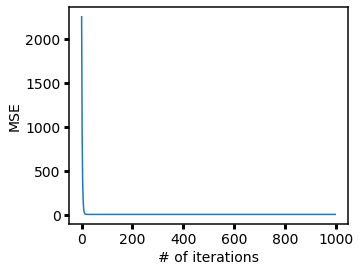

In [31]:
learning_rate = 0.1
num_iterations = 1000
m = len(y)
theta = np.random.randn(2, 1)
cost = []
for i in range(num_iterations):
    gradient = 2/m * xb_standard.T.dot(xb_standard.dot(theta) - y)
    theta = theta - learning_rate * gradient
    cost.append(mse(xb_standard, y, theta))

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5,4))
plt.plot(cost)
ax.set_xlabel('# of iterations', fontsize = 14)
ax.set_ylabel('MSE', fontsize = 14)
plt.show()

In [32]:
print(theta)

[[51.2050511 ]
 [28.86467636]]


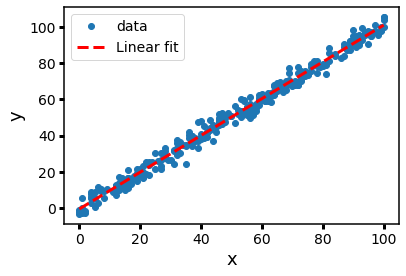

In [34]:
x_fit = np.linspace(0, 100, num=200)
x_fit_standard = (x_fit - mu)/sigma
x_fit_standard_b = np.c_[np.ones((len(x_fit_standard), 1)), x_fit_standard]
y_fit = x_fit_standard_b.dot(theta)

plt.plot('x','y',data = linear_data, marker = 'o', linestyle = '', label = 'data')
plt.plot(x_fit, y_fit, color = 'r', lw = 3, linestyle = '--', label = 'Linear fit')
plt.xlabel('x',fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

以上可知，利用更高的学习速率和较少的迭代次数，也能实现函数拟合。

#### Stochastic Gradient Descent
随机梯度在某一次使用一个样本进行梯度下降的计算，SGD尝试利用随机从样本集中选择的$\bar{y}^{(i)}$，通过计算$(\bar{y}^{(i)}-y)^2$来降低$mse(\vec \theta)$的大小，则迭代函数可以写作为
$$2\times\vec x ^{(i)T}\cdot(\vec x^{(i)}\cdot\vec \theta - y^{(i)})$$

可以使用的Tips:
- 学习速率：使用模拟退火，可以帮助算法在学习结束时期达到最小值
- 学习调度：确定学习速率如何随着迭代而变化的函数
- Epochs:每次要运行的迭代轮数

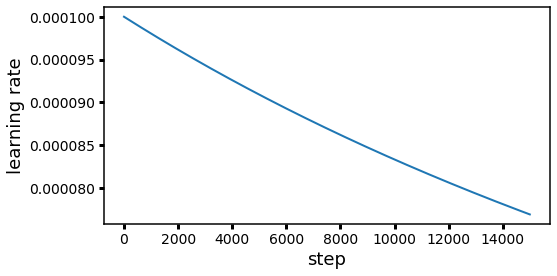

In [35]:
num_epochs = 1000
def learning_schedule(step):
    return 5/(50000+step)

s = np.linspace(0, 15000, num=15001)
l = learning_schedule(s)
m = len(y)

fig, ax = plt.subplots(figsize = (8,4))
plt.plot(s,l, lw = 2)
#plt.xlim(0,15000)
plt.xlabel('step', fontsize = 18)
plt.ylabel('learning rate', fontsize = 18)
plt.show()

In [39]:
theta = np.random.randn(2,1)

cost = []
for epoch in range(num_epochs):
    for i in range(m):
        idx = np.random.randint(m)
        xbi = xb[idx:idx+1]
        yi = y[idx:idx+1]
        gradient = 2*xbi.T.dot(xbi.dot(theta)-yi) # sample size is one
        learning_rate = learning_schedule(epoch*m + i) # step = epoch*m + i
        theta = theta - learning_rate * gradient
        cost.append(mse(xb,y,theta))

In [40]:
print(theta)

[[-0.47161028]
 [ 1.00601108]]


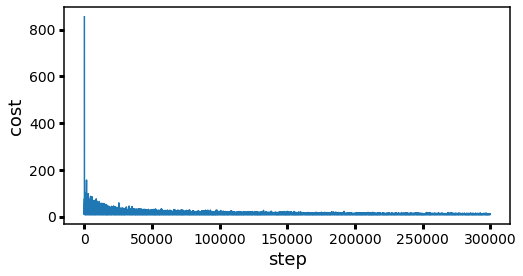

In [41]:
fig, ax = plt.subplots(figsize = (8,4))
plt.plot(cost)
#plt.xlim(0,20000)
plt.ylabel('cost', fontsize = 18)
plt.xlabel('step', fontsize = 18)
plt.show()

可以看到MSE有所波动，但总体而言正在下降。 同样，如果学习率过高，则成本函数将会错过最优点

In [43]:
num_epochs = 100
def learning_schedule(step):
    return 5./(10000+step)

theta = np.random.randn(2, 1)
cost = []
for epoch in range(num_epochs):
    for i in range(m):
        idx = np.random.randint(m) # 0,1,...,m-1
        xbi = xb[idx:idx+1]
        yi = y[idx:idx+1]
        gradient = 2 * xbi.T.dot(xbi.dot(theta) - yi)
        learning_rate = learning_schedule(epoch * m + i)
        theta = theta - learning_rate * gradient
        cost.append(mse(xb, y, theta))

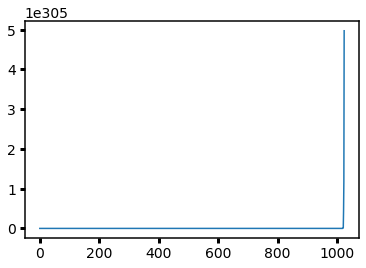

In [44]:
plt.plot(cost)
plt.show()

In [45]:
from sklearn.linear_model import SGDRegressor

In [46]:
# max_iter is the total number of epochs, eta0 is the starting learning rate
# penalty = None, meaning there is no regularization.
model = SGDRegressor(eta0 = 0.0005, penalty = None, max_iter = 10000)
model.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=10000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [47]:
model.intercept_, model.coef_

(array([-0.05438186]), array([1.01674941]))

#### Mini-batch Gradient Descent

In [48]:
from sklearn.utils import shuffle

In [52]:
batchsize = 30 # size of each of the mini batch
theta = np.random.randn(2,1)
num_epochs = 5000
learning_rate = 0.0002
for epoch in range(num_epochs):
    xb_shuffled, y_shuffled = shuffle(xb, y)
    for i in range(0, xb_shuffled.shape[0], batchsize):
        xbi = xb_shuffled[i:i+batchsize]
        yi = y_shuffled[i:i+batchsize]
        gradient = 2/batchsize*xbi.T.dot(xbi.dot(theta) - yi)
        theta = theta - learning_rate * gradient

In [53]:
print(theta)

[[-0.46694523]
 [ 1.00321339]]


上面的简单线性回归模型可以轻松地扩展为多项式回归模型。 一下为了说明多项式回归

In [55]:
advanced_data = pd.read_csv('data/regression/advanced.csv')
advanced_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


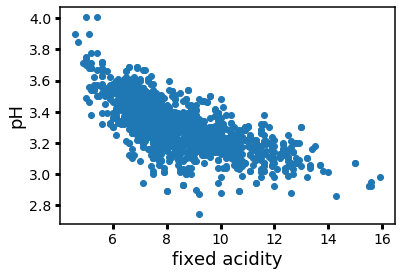

In [57]:
plt.plot('fixed acidity','pH', data = advanced_data, marker = 'o', linestyle = '') # fixed acidity, pH
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [58]:
reg = LinearRegression()
x = advanced_data['fixed acidity'].as_matrix().reshape(-1,1)
y = advanced_data['pH'].as_matrix().reshape(-1,1)
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

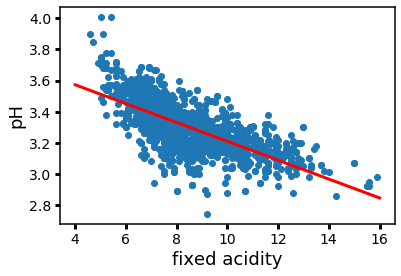

In [59]:
x_fit = np.linspace(4,16,num=100).reshape(-1,1)
y_fit = reg.predict(x_fit)
plt.plot('fixed acidity','pH', data = advanced_data, marker = 'o', linestyle = '') 
plt.plot(x_fit,y_fit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [60]:
# compute MSE
xb = np.c_[np.ones((len(x),1)),x]
theta = np.array([reg.intercept_[0],reg.coef_[0][0]]).reshape(-1,1)

linear_mse = mse(xb,y,theta)
print(linear_mse)

0.012709087835248862


In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [64]:
poly = PolynomialFeatures(degree=2, include_bias = False)
x_poly = poly.fit_transform(x)
print(x_poly[0:5])

[[  7.4   54.76]
 [  7.8   60.84]
 [  7.8   60.84]
 [ 11.2  125.44]
 [  7.4   54.76]]


In [65]:
reg = LinearRegression()
reg.fit(x_poly,y)
print(reg.intercept_, reg.coef_)

[4.34821937] [[-0.18225037  0.00663222]]


In [66]:
x_fit=np.linspace(4,16,num=100).reshape(-1,1)
x_fit=poly.fit_transform(x_fit)
#print(xFit[0:5])
y_fit = reg.predict(x_fit)

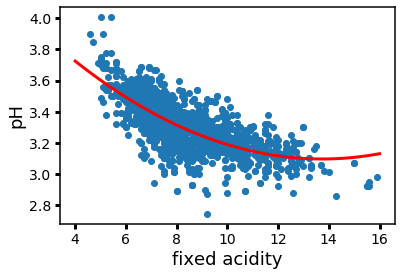

In [67]:
plt.plot('fixed acidity','pH', data = advanced_data, marker = 'o', linestyle = '') 
plt.plot(x_fit[:,0],y_fit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

In [68]:
# compute MSE
xb = np.c_[np.ones((len(x),1)),x_poly]
theta = np.array([reg.intercept_[0],reg.coef_[0][0],reg.coef_[0][1]]).reshape(-1,1)

poly_mse = mse(xb,y,theta)
print(poly_mse)

0.011836731145634345


In [72]:
poly = PolynomialFeatures(degree=20, include_bias = False)
x_poly = poly.fit_transform(x)
print(x_poly[0:1])

reg = LinearRegression()
reg.fit(x_poly,y)

x_fit = np.linspace(4,16,num=100).reshape(-1,1)
x_fit = poly.fit_transform(x_fit)
y_fit = reg.predict(x_fit)

[[7.40000000e+00 5.47600000e+01 4.05224000e+02 2.99865760e+03
  2.21900662e+04 1.64206490e+05 1.21512803e+06 8.99194740e+06
  6.65404108e+07 4.92399040e+08 3.64375289e+09 2.69637714e+10
  1.99531908e+11 1.47653612e+12 1.09263673e+13 8.08551181e+13
  5.98327874e+14 4.42762627e+15 3.27644344e+16 2.42456814e+17]]


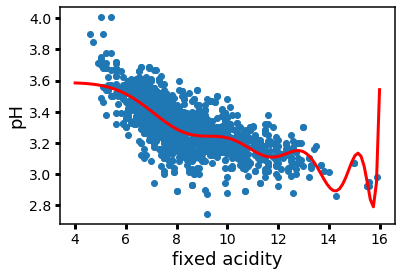

In [70]:
plt.plot('fixed acidity','pH', data = advanced_data, marker = 'o', linestyle = '') 
plt.plot(x_fit[:,0],y_fit, color = 'r',lw=3)
plt.xlabel('fixed acidity', fontsize = 18)
plt.ylabel('pH', fontsize = 18)
plt.show()

## Reference

[1. statsmodels.org](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html)

[2. revel()](https://blog.csdn.net/tymatlab/article/details/79009618)

[3. Polynomialfeatures](https://blog.csdn.net/hushenming3/article/details/80500364)